# **Códificación Huffman**

La codificación Huffman es un método ampliamente utilizado en la compresión de datos. Se utiliza para codificar un texto en binario, utilizando para cada letra un número de bits en función del número de veces que aparece la letra: cuanto más aparece la letra, menor es el número de bits. Por lo tanto, el número total de bits utilizados para codificar el texto se reduce en comparación con la codificación ASCII estándar que utiliza ocho bits para cada letra.

La codificación Huffman usa un método específico para elegir la representación de cada símbolo, que da lugar a un código prefijo (es decir, la cadena de bits que representa a un símbolo en particular nunca es prefijo de la cadena de bits de un símbolo distinto) que representa los caracteres más comunes usando las cadenas de bits más cortas, y viceversa. 

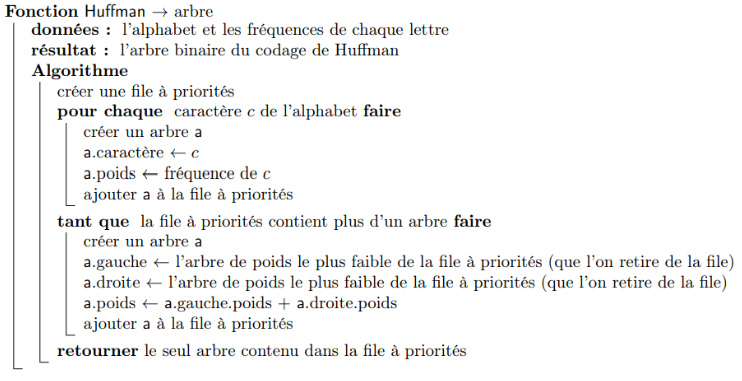

### 1. Fuente de información

In [2]:
# 1. Fuente de información (leyendo un archivo de texto)

def leer_archivo(nombre_archivo): 
    try:
        with open(nombre_archivo, 'r') as archivo:
            contenido = archivo.read()
            return contenido
    except FileNotFoundError:
        print(f"El archivo '{nombre_archivo}' no fue encontrado.")
        return ""

nombre_archivo_fuente = "fuente.txt"

texto_original = leer_archivo(nombre_archivo_fuente)

print("Mensaje:", texto_original)

Mensaje: Hola, esto es un mensaje de prueba para la comunicacion.


### 2. Transmisor

In [3]:
# 2. Transmisor (Convierte el texto de entrada a binario)

def texto_a_binario(mensaje):
    binario = ''.join(format(ord(char), '08b') for char in mensaje)
    return binario

class Nodo:
    def __init__(self, char, freq, izq=None, der=None):
        self.char = char
        self.freq = freq
        self.izq = izq
        self.der = der

def arbol_huffman(texto):
    freq = dict()
    for char in texto:
        if char not in freq:
            freq[char] = 0
        freq[char] += 1

    nodos = [Nodo(char, f) for char, f in freq.items()]
    while len(nodos) > 1:
        nodos = sorted(nodos, key=lambda x: x.freq)  # Ordena los nodos por frecuencia
        izq = nodos.pop(0)
        der = nodos.pop(0)
        nodo = Nodo(None, izq.freq + der.freq, izq, der)
        nodos.append(nodo)
    return nodos[0]  # Nodo raíz

def diccionario_huffman(nodo, codigo_binario="", diccionario=dict()):
    if nodo is None:
        return
    if nodo.char is not None:
        diccionario[nodo.char] = codigo_binario
    diccionario_huffman(nodo.izq, codigo_binario + "0", diccionario)
    diccionario_huffman(nodo.der, codigo_binario + "1", diccionario)
    return diccionario

In [4]:
texto_binario = texto_a_binario(texto_original)

### 3. Canal

In [5]:
# 3. Canal (agregar ruido a la cadena binaria)

### 4. Receptor

In [6]:
def decodificar(texto_codificado, nodo_raiz):
    texto = ""
    nodo_actual = nodo_raiz
    for bit in texto_codificado:
        if bit == '0':
            nodo_actual = nodo_actual.izq
        else:  # bit == '1'
            nodo_actual = nodo_actual.der
        if nodo_actual.char is not None:  # Es un nodo hoja
            texto += nodo_actual.char
            nodo_actual = nodo_raiz
    return texto

In [7]:
raiz = arbol_huffman(texto_original)
diccionario = diccionario_huffman(raiz)
texto_codificado = "".join(diccionario[char] for char in texto_original)
texto_decodificado = decodificar(texto_codificado, raiz)

### 5. Destino de información

In [8]:
# 5. Destino de Información (Destinatario)

print("Cadena binaria original:",texto_binario)
print("Cadena binaria comprimida:",texto_codificado)
print("")
print("Mensaje enviado:",texto_original)
print("Mensaje recibido:",texto_decodificado)

Cadena binaria original: 0100100001101111011011000110000100101100001000000110010101110011011101000110111100100000011001010111001100100000011101010110111000100000011011010110010101101110011100110110000101101010011001010010000001100100011001010010000001110000011100100111010101100101011000100110000100100000011100000110000101110010011000010010000001101100011000010010000001100011011011110110110101110101011011100110100101100011011000010110001101101001011011110110111000101110
Cadena binaria comprimida: 1101001001100010111101011110010001110110100111100100011110100101011110110001101000010111101110011110000000111110111110000100001000010111111011101111000011111100010111110101100110110010010101100101010110101110011001101010000

Mensaje enviado: Hola, esto es un mensaje de prueba para la comunicacion.
Mensaje recibido: Hola, esto es un mensaje de prueba para la comunicacion.


In [9]:
print("Lista de simbolos")
diccionario

Lista de simbolos


{'d': '00000',
 'b': '00001',
 's': '0001',
 'e': '001',
 'u': '0100',
 'c': '0101',
 'a': '011',
 '.': '10000',
 'l': '10001',
 'o': '1001',
 'n': '1010',
 'm': '10110',
 'p': '10111',
 'r': '11000',
 'i': '11001',
 'H': '110100',
 ',': '110101',
 't': '110110',
 'j': '110111',
 ' ': '111'}